In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()



'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [3]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx


/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Hamilton46.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Trinity100.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-USFCA72.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Williams40.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Oberlin44.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Wellesley22.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Smith60.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Vassar85.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine8

In [4]:
import os
os.getcwd()
os.environ['DATA_PATH'] = '../../FE_FB_copyweights_cube/'

df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')

df.Info = df.Info.apply(lambda temp: {key: eval(var) for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

In [5]:
df.sort_values('Graph').loc[:, ['Graph', 'Model', 'Nodes', 'Info']]

,Graph,Model,Nodes,Info
89,socfb-American75,2d-copyweight-cube-girg,6338,"{'tau': 4.849201442177161, 'alpha': 1.05925190..."
79,socfb-American75,1d-copyweight-cube-girg,6356,"{'tau': 4.849201442177161, 'alpha': 1.07671601..."
101,socfb-American75,3d-copyweight-cube-girg,6341,"{'tau': 4.849201442177161, 'alpha': 1.05073058..."
21,socfb-Amherst41,2d-copyweight-cube-girg,2231,"{'tau': 5.642546890477902, 'alpha': 1.08566581..."
10,socfb-Amherst41,1d-copyweight-cube-girg,2228,"{'tau': 5.642546890477902, 'alpha': 1.11343075..."
...,...,...,...,...
15,socfb-Williams40,1d-copyweight-cube-girg,2785,"{'tau': 5.1655263550168184, 'alpha': 1.1181969..."
28,socfb-Williams40,2d-copyweight-cube-girg,2777,"{'tau': 5.1655263550168184, 'alpha': 1.0947656..."
140,socfb-Yale4,2d-copyweight-cube-girg,8506,"{'tau': 5.790413433544749, 'alpha': 1.04234527..."
151,socfb-Yale4,3d-copyweight-cube-girg,8519,"{'tau': 5.790413433544749, 'alpha': 1.02195608..."


In [6]:
df.iloc[21][['Graph', 'Model', 'Nodes', 'Info']]
df.iloc[21].Info
alpha, const = df.iloc[21].Info['alpha'], df.iloc[21].Info['const']
print(alpha, const)

1.0856658184902461 0.07032075311965111


In [8]:
df.loc[df.Model == '1d-copyweight-cube-girg'].sort_values('Nodes').loc[:,['Graph', 'Model', 'Nodes', 'Info'] ]

,Graph,Model,Nodes,Info
0,socfb-Caltech36,1d-copyweight-cube-girg,756,"{'tau': 7.3017225936374555, 'alpha': 1.2171928..."
1,socfb-Reed98,1d-copyweight-cube-girg,955,"{'tau': 4.381732472502371, 'alpha': 1.07671601..."
4,socfb-Haverford76,1d-copyweight-cube-girg,1440,"{'tau': 6.5461700448727616, 'alpha': 1.0592519..."
3,socfb-Simmons81,1d-copyweight-cube-girg,1497,"{'tau': 4.739342146243066, 'alpha': 1.16300199..."
6,socfb-Swarthmore42,1d-copyweight-cube-girg,1657,"{'tau': 5.598783007439967, 'alpha': 1.04234527..."
...,...,...,...,...
162,socfb-MSU24,1d-copyweight-cube-girg,32345,"{'tau': 5.112979295133962, 'alpha': 1.02195608..."
167,socfb-UF,1d-copyweight-cube-girg,35095,"{'tau': 4.918454781144023, 'alpha': 1.05073058..."
165,socfb-UF21,1d-copyweight-cube-girg,35101,"{'tau': 4.918454781144023, 'alpha': 1.04652113..."
117,socfb-Texas84,1d-copyweight-cube-girg,36354,"{'tau': 4.774843344808111, 'alpha': 1.01010101..."


In [9]:
gd = list(filter(lambda x: x['Name'] == 'socfb-Amherst41', do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

Network Properties:
nodes, edges			2235, 90954
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.036433
clustering coefficient		0.310386
min/max/avg degree		1, 467, 81.390604
degree assortativity		0.058704
number of connected components	1
size of largest component	2235 (100.00 %)


In [10]:
import feature_extractor
fe = feature_extractor.FeatureExtractor([])

In [108]:
g_degs = [g.degree(i) for i in range(g.numberOfNodes())]

argsorted = np.argsort(g_degs)[::-1]


cl = fe.fit_chung_lu(g)
gnx = nk.nxadapter.nk2nx(cl)
A_cl = nx.linalg.adjacency_matrix(gnx).todense()
A_cl = A_cl[:, argsorted][argsorted, :]

out, p1, p2 = mcmc.CM(A, A_cl)
print(p1, p2)
out

0.0368647887943356 0.9631372376565266


array([[6,706, 175,202],
       [175,212, 4,638,105]])

In [110]:
g_degs = [g.degree(i) for i in range(g.numberOfNodes())]

argsorted = np.argsort(g_degs)[::-1]


cl = fe.fit_chung_lu(g)
gnx = nk.nxadapter.nk2nx(cl)
A_cl = nx.linalg.adjacency_matrix(gnx).todense()
# A_cl = A_cl[:, argsorted][argsorted, :]

out, p1, p2 = mcmc.CM(A[:, argsorted][argsorted, :], A_cl)
print(p1, p2)
out

0.09493810057831431 0.9050671181521345


array([[17,270, 164,638],
       [164,648, 4,648,669]])

In [109]:
argsorted

array([1,699, 1,422, 221, ..., 61, 251, 259])

In [ ]:
g_degs = [g.degree(i) for i in range(g.numberOfNodes())]

In [89]:
temp = np.argsort(g_degs)[::-1]
g_degs[1699]

467

In [87]:
g_degs[259]

1

In [ ]:
clx = n

In [100]:
temp = np.arange(25).reshape(5, 5)
temp = 0.5 * temp + 0.5 * temp.T
temp

array([[ 0.,  3.,  6.,  9., 12.],
       [ 3.,  6.,  9., 12., 15.],
       [ 6.,  9., 12., 15., 18.],
       [ 9., 12., 15., 18., 21.],
       [12., 15., 18., 21., 24.]])

In [101]:
temp2 = temp[:, [3, 1, 2, 4, 0]]
temp2

array([[ 9.,  3.,  6., 12.,  0.],
       [12.,  6.,  9., 15.,  3.],
       [15.,  9., 12., 18.,  6.],
       [18., 12., 15., 21.,  9.],
       [21., 15., 18., 24., 12.]])

In [102]:
temp3 = temp2[[3, 1, 2, 4, 0], :]
temp3

array([[18., 12., 15., 21.,  9.],
       [12.,  6.,  9., 15.,  3.],
       [15.,  9., 12., 18.,  6.],
       [21., 15., 18., 24., 12.],
       [ 9.,  3.,  6., 12.,  0.]])

In [84]:
for i in range(20):
    print(cl.degree(i))
print('aaaaaa')
for i in range(20):
    print(g.degree(i))

475
449
488
364
380
346
356
328
315
357
314
315
316
320
295
302
301
354
299
299
aaaaaa
25
79
193
99
214
21
13
105
34
48
86
177
47
30
8
80
164
44
32
17


(array([167., 151., 174., 179., 152., 133., 141., 157., 118., 129., 124.,
         95.,  69.,  71.,  66.,  57.,  42.,  36.,  22.,  33.,  13.,  17.,
         10.,  14.,  14.,   9.,   4.,   6.,   4.,   3.,   9.,   1.,   5.,
          1.,   0.,   1.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   1.]),
 array([  0.  ,   9.76,  19.52,  29.28,  39.04,  48.8 ,  58.56,  68.32,
         78.08,  87.84,  97.6 , 107.36, 117.12, 126.88, 136.64, 146.4 ,
        156.16, 165.92, 175.68, 185.44, 195.2 , 204.96, 214.72, 224.48,
        234.24, 244.  , 253.76, 263.52, 273.28, 283.04, 292.8 , 302.56,
        312.32, 322.08, 331.84, 341.6 , 351.36, 361.12, 370.88, 380.64,
        390.4 , 400.16, 409.92, 419.68, 429.44, 439.2 , 448.96, 458.72,
        468.48, 478.24, 488.  ]),
 <BarContainer object of 50 artists>)

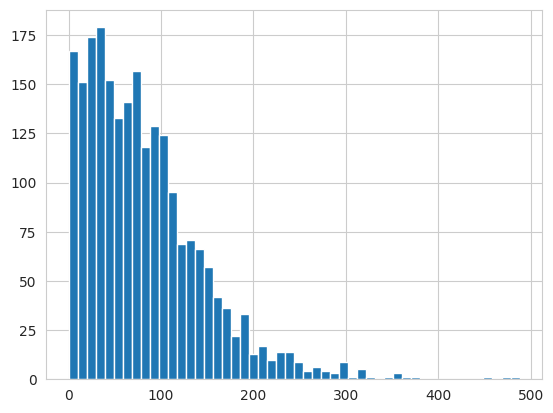

In [82]:
plt.hist([cl.degree(i) for i in range(cl.numberOfNodes())], bins=50)

(array([176., 136., 166., 155., 158., 140., 139., 134., 119., 142., 123.,
         81.,  94.,  71.,  57.,  56.,  52.,  35.,  38.,  23.,  14.,  21.,
         19.,  11.,  13.,  10.,  11.,   3.,   6.,   3.,   4.,   3.,   4.,
          5.,   3.,   2.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   2.]),
 array([  1.  ,  10.32,  19.64,  28.96,  38.28,  47.6 ,  56.92,  66.24,
         75.56,  84.88,  94.2 , 103.52, 112.84, 122.16, 131.48, 140.8 ,
        150.12, 159.44, 168.76, 178.08, 187.4 , 196.72, 206.04, 215.36,
        224.68, 234.  , 243.32, 252.64, 261.96, 271.28, 280.6 , 289.92,
        299.24, 308.56, 317.88, 327.2 , 336.52, 345.84, 355.16, 364.48,
        373.8 , 383.12, 392.44, 401.76, 411.08, 420.4 , 429.72, 439.04,
        448.36, 457.68, 467.  ]),
 <BarContainer object of 50 artists>)

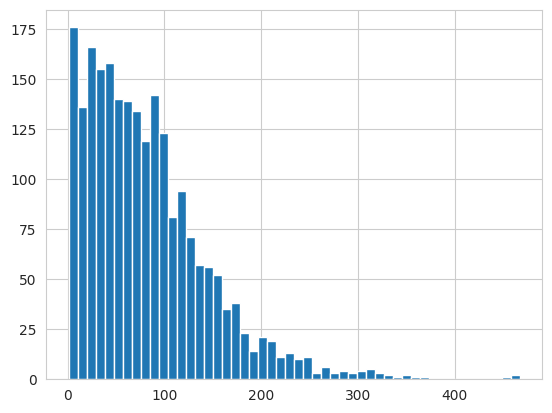

In [83]:
plt.hist([g.degree(i) for i in range(g.numberOfNodes())], bins=50)

In [73]:
nk.overview(cl)

Network Properties:
nodes, edges			2235, 90959
directed?			False
weighted?			False
isolated nodes			14
self-loops			0
density				0.036435
clustering coefficient		0.092243
min/max/avg degree		0, 488, 81.395078
degree assortativity		0.436970
number of connected components	15
size of largest component	2221 (99.37 %)


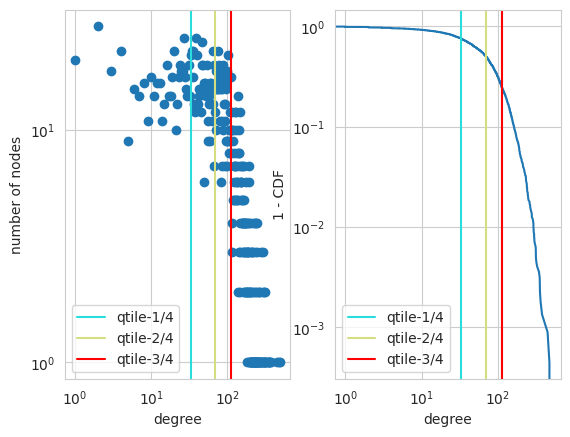

In [76]:
from benji_girgs import plotting
%matplotlib inline
plotting.plot_degree_dist(cl, vlines=4)

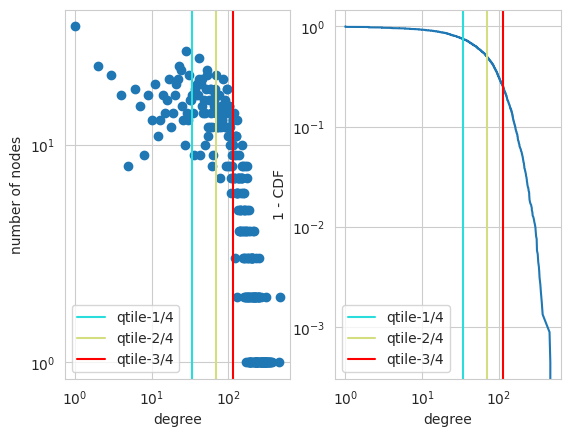

In [79]:
plotting.plot_degree_dist(g, vlines=4)

In [8]:
# n = 1500
# d=2
# tau=2.1
# alpha=1.2
# desiredAvgDegree=100.0
#
# g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree,
#                                                                 points_type=points.PointsCube)
#
# g = utils.get_largest_component(g)
# nk.overview(g)
# n = g.numberOfNodes()

In [38]:
import importlib
importlib.reload(mcmc)
from tests import test_mcmc

In [39]:
g, A, weights, const, pts, MC = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=2, diffmap_init=False, graph_name='socfb-Amherst41')

calibrating const
const: 0.07032075311965111, expected_num_edges: 90986.58465801514
const: 0.07029556943240334, expected_num_edges: 90960.8292183342
const: 0.07029029173434687, expected_num_edges: 90955.43142060186
const: 0.0702891855335392, expected_num_edges: 90954.30003640844
const: 0.07028895366638425, expected_num_edges: 90954.06289083908
const: 0.07028890506458316, expected_num_edges: 90954.01318263529
const: 0.07028889487709425, expected_num_edges: 90954.00276323223


In [20]:
g_dm, A_dm = MC.MC_to_g_A()
np.set_printoptions(formatter={'int_kind': '{:,}'.format})

nk.overview(g_dm)


Network Properties:
nodes, edges			2235, 89903
directed?			False
weighted?			False
isolated nodes			7
self-loops			0
density				0.036012
clustering coefficient		0.309597
min/max/avg degree		0, 427, 80.450112
degree assortativity		0.051219
number of connected components	8
size of largest component	2228 (99.69 %)


In [12]:
nk.overview(g)

Network Properties:
nodes, edges			2235, 90954
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.036433
clustering coefficient		0.310386
min/max/avg degree		1, 467, 81.390604
degree assortativity		0.058704
number of connected components	1
size of largest component	2235 (100.00 %)


In [21]:
g_dm, A_dm = MC.MC_to_g_A()

out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_dm)
print(out)
print(percent_edges_captured)
print(percent_fake_edges_wrong)
print()


[[14,470 167,438]
 [164,308 4,649,009]]
0.07954570442201553
0.9190616295069863



(array([[5., 6., 2., 2., 0., 2., 1., 3., 3., 3., 3., 2., 2., 2., 1., 2.,
         1., 5., 2., 1., 2., 0., 2., 2., 9., 2., 4., 3., 1., 1.],
        [2., 5., 2., 1., 1., 4., 3., 6., 1., 6., 0., 4., 4., 3., 5., 3.,
         1., 2., 4., 5., 4., 4., 1., 2., 4., 0., 2., 4., 3., 5.],
        [4., 6., 1., 0., 2., 4., 3., 4., 2., 5., 1., 5., 4., 4., 1., 0.,
         2., 3., 1., 2., 5., 0., 1., 4., 3., 4., 0., 3., 4., 3.],
        [3., 1., 1., 5., 2., 6., 2., 3., 1., 1., 4., 5., 1., 3., 1., 4.,
         1., 3., 3., 5., 2., 0., 5., 1., 4., 2., 5., 3., 1., 1.],
        [1., 4., 4., 2., 0., 3., 1., 0., 2., 2., 2., 3., 3., 1., 2., 2.,
         2., 0., 2., 2., 4., 0., 2., 1., 0., 3., 4., 3., 3., 2.],
        [4., 1., 1., 0., 4., 1., 3., 2., 0., 3., 1., 4., 2., 0., 3., 2.,
         2., 1., 1., 3., 1., 0., 1., 2., 0., 3., 5., 1., 4., 4.],
        [1., 1., 2., 0., 5., 3., 0., 3., 2., 6., 8., 3., 5., 0., 0., 1.,
         2., 3., 5., 3., 3., 0., 2., 3., 2., 1., 4., 2., 2., 2.],
        [0., 1., 0., 4., 2.

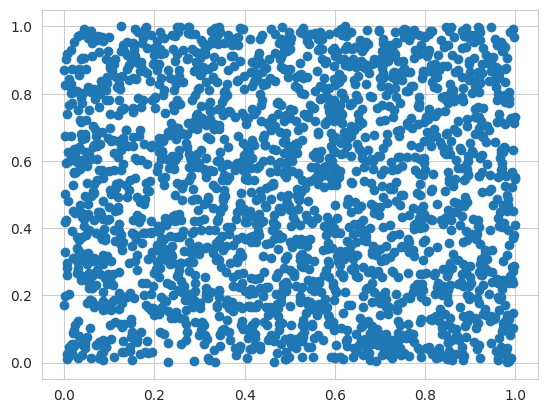

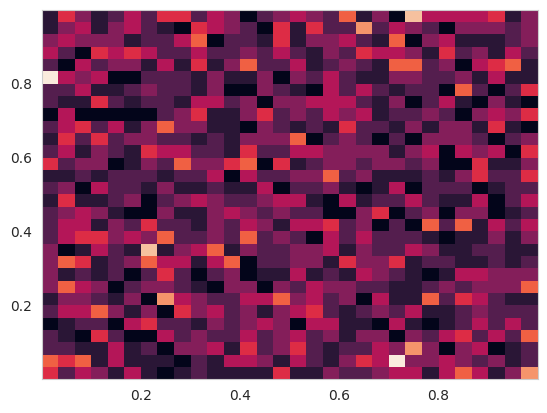

In [22]:
%matplotlib inline
# a = MC.pts[:, 0]
# plt.hist(a[a<0.04], bins=50)

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.figure()
plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [23]:
MC.ll

-1557859.0230782866

In [41]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [42]:
MC.run_pool(5000, pool_size=15, jobs_per_worker=25, plot_every=3000)

5250it [00:13, 375.07it/s]                          


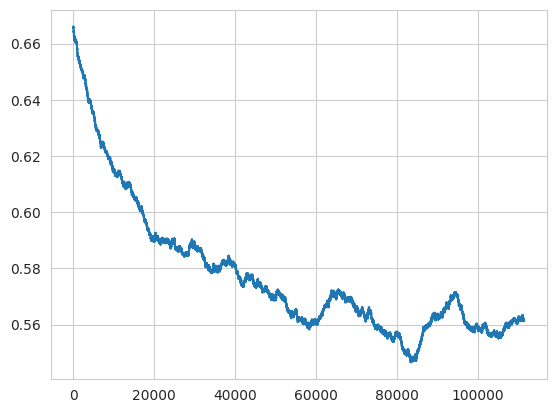

In [28]:
%matplotlib inline
MC.acceptances_plot(convolve_width=10000)

In [18]:
os.environ['DATA_PATH'] = '../../MCMC_testing/'

In [33]:
os.environ['DATA_PATH']

'../../MCMC_testing/'

In [34]:
os.getcwd()

'/cluster/home/bdayan/girgs/benji_src/notebooks'

(array([[ 6.,  2.,  3.,  5.,  3.,  3.,  6.,  2.,  2.,  5.,  3.,  3.,  2.,
          9.,  2.,  3.,  5.,  4.,  3.,  3.,  2.,  4.,  5.,  3.,  6.,  4.,
          2.,  1.,  4.,  7.],
        [ 2.,  2.,  1.,  0.,  0.,  1.,  2.,  1.,  1.,  4.,  2.,  0.,  0.,
          1.,  1.,  2.,  1.,  0.,  1.,  1.,  2.,  4.,  1.,  1.,  2.,  0.,
          0.,  2.,  3.,  2.],
        [ 3.,  2.,  1.,  2.,  3.,  2.,  1.,  1.,  1.,  2.,  0.,  0.,  1.,
          2.,  2.,  0.,  1.,  2.,  3.,  0.,  2.,  1.,  1.,  1.,  1.,  2.,
          1.,  0.,  5.,  4.],
        [ 2.,  0.,  1.,  6.,  2.,  2.,  5.,  4.,  3.,  1.,  0.,  2.,  1.,
          2.,  4.,  2.,  2.,  3.,  1.,  2.,  0.,  2.,  0.,  4.,  0.,  0.,
          2.,  1.,  2.,  0.],
        [ 7.,  2.,  1.,  3.,  1.,  3.,  3.,  2.,  1.,  8.,  3.,  3.,  2.,
          0.,  2.,  1.,  1.,  2.,  1.,  3.,  3.,  3.,  1.,  4.,  2.,  7.,
          1.,  0.,  4.,  3.],
        [ 2.,  0.,  3.,  3.,  2.,  2.,  1.,  2.,  0.,  0.,  1.,  0.,  3.,
          4.,  3.,  4.,  0.,  3.,  2

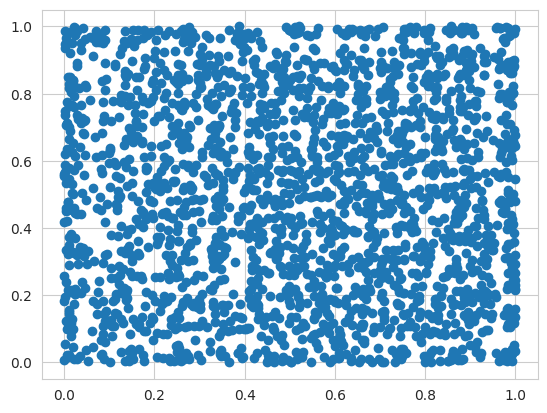

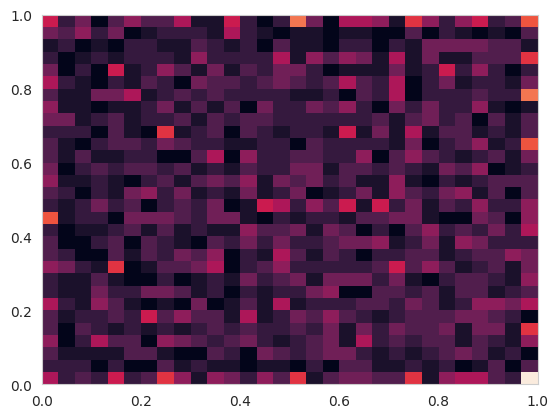

In [29]:
%matplotlib inline
# a = MC.pts[:, 0]
# plt.hist(a[a<0.04], bins=50)

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.figure()
plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [29]:
MC.expected_num_edges

60594.809209926796

In [30]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)

out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_dm)
print(out)
print(percent_edges_captured)
print(percent_fake_edges_wrong)


[[19,872 162,036]
 [159,822 4,653,495]]
0.10924203443498912
0.8894120004006811


In [25]:
nk.overview(g_dm)
nk.overview(g)
nk.overview(g_init)

Network Properties:
nodes, edges			1500, 456007
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.405610
clustering coefficient		0.650004
min/max/avg degree		145, 1499, 608.009333
degree assortativity		-0.104838
number of connected components	1
size of largest component	1500 (100.00 %)
Network Properties:
nodes, edges			1500, 60881
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.054153
clustering coefficient		0.526791
min/max/avg degree		9, 1317, 81.174667
degree assortativity		-0.171705
number of connected components	1
size of largest component	1500 (100.00 %)
Network Properties:
nodes, edges			1500, 517006
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.459867
clustering coefficient		0.686715
min/max/avg degree		156, 1499, 689.341333
degree assortativity		-0.118490
number of connected components	1
size of largest component	1500 (100.00 %)


In [34]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
# g_init, A_init = test_mcmc.MC_to_g_A(MC_init)

nk.overview(g_dm)
nk.overview(g_init)

CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'

const_in: 0.3975894770262727
Network Properties:
nodes, edges			3745, 134811
directed?			False
weighted?			False
isolated nodes			15
self-loops			0
density				0.019229
clustering coefficient		0.302392
min/max/avg degree		0, 553, 71.995194
degree assortativity		0.107403
number of connected components	16
size of largest component	3730 (99.60 %)
Network Properties:
nodes, edges			3745, 129178
directed?			False
weighted?			False
isolated nodes			10
self-loops			0
density				0.018426
clustering coefficient		0.330564
min/max/avg degree		0, 567, 68.986916
degree assortativity		0.002647
number of connected components	11
size of largest component	3735 (99.73 %)


array([[0.0015478 , 0.01013146],
       [0.01767655, 0.97064419]])

array([[0.13252585, 0.86747415],
       [0.01788543, 0.98211457]])

array([[7.47378347e-04, 1.09318878e-02],
       [1.76736940e-02, 9.70647040e-01]])

array([[0.06399189, 0.93600811],
       [0.01788255, 0.98211745]])

':)'

In [ ]:
MC.plot_ll(MC.num_steps)

In [26]:
MC.calculate_ll()

-1202958.4914603485

In [102]:
MC.ll_steps

[0,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 12,
 13,
 15,
 16,
 17,
 18,
 23,
 24,
 26,
 27,
 28,
 29,
 31,
 32,
 34,
 36,
 39,
 44,
 45,
 49,
 55,
 57,
 58,
 61,
 67,
 73,
 74,
 78,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 89,
 91,
 92,
 93,
 94,
 97,
 98,
 99,
 101,
 107,
 112,
 114,
 115,
 116,
 122,
 123,
 124,
 125,
 131,
 134,
 135,
 136,
 137,
 139,
 140,
 142,
 143,
 144,
 145,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 167,
 168,
 169,
 170,
 172,
 175,
 176,
 177,
 179,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 189,
 190,
 194,
 195,
 198,
 202,
 203,
 204,
 205,
 208,
 211,
 212,
 214,
 215,
 217,
 218,
 219,
 221,
 222,
 226,
 227,
 228,
 229,
 230,
 231,
 233,
 234,
 236,
 237,
 241,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 253,
 256,
 257,
 259,
 263,
 264,
 266,
 267,
 273,
 275,
 276,
 277,
 280,
 285,
 286,
 288,
 289,
 290,
 291,
 297,
 300,
 301,
 302,
 303,
 305,
 307,
 308,
 311,
 312,
 315,
 316,
 319,
 320,
 325,
 326,
 331,
 333,
 340,
 342,
 344,
 345,
 346,
 347,
 34

In [43]:
import pickle
with open('temp.pkl', 'wb') as file:
    pickle.dump(MC, file)

In [44]:
with open('temp.pkl', 'rb') as file:
    foo = pickle.load(file)

In [45]:
dir(foo)

['A',
 'MC_to_g_A',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'acceptance_prob',
 'acceptance_prob_static',
 'acceptances_plot',
 'alpha',
 'calculate_ll',
 'calibrate_const',
 'const',
 'const_in',
 'd',
 'expected_num_edges',
 'fix_lls_and_const',
 'g',
 'gen_girg',
 'get_CM',
 'graph_name',
 'll',
 'll_steps',
 'lls',
 'n',
 'num_acceptances',
 'num_steps',
 'outs',
 'p_u_to_vs_to_ll',
 'percent_edges_captureds',
 'plot_ll',
 'pool',
 'pool_step',
 'proposal',
 'pts',
 'pts_init',
 'pts_type',
 'run',
 'run_pool',
 'run_pool2',
 'shared_pts',
 'shared_pts_init',
 'step0',
 'step1',
 'step2',
 'step_pool',
 'update_ll',
 'weigh

In [50]:
foo.shared_pts == MC.shared_pts

False

In [67]:
import multiprocessing
import ctypes

def gs(self):
    state = self.__dict__.copy()
    del state['shared_pts']
    del state['shared_pts_init']

def ss(self, state):
    self.__dict__.update(state)
    if self.pool:
        self.shared_pts = multiprocessing.Array(ctypes.c_double, self.pts.flatten())
        self.pts = self.pts_type(np.frombuffer(self.shared_pts.get_obj()).reshape(self.pts.shape))
        self.shared_pts_init = multiprocessing.Array(ctypes.c_double, self.pts_init.flatten())
        self.pts_init = self.pts_type(np.frombuffer(self.shared_pts_init.get_obj()).reshape(self.pts_init.shape))

MC.__getstate__ = gs
MC.__setstate__ = ss

In [81]:
MC.calculate_ll()

-1197406.9692224392

In [77]:
MC.calculate_ll()

-1199493.5638940108

In [44]:
def mcmc_girg_init_worker(pts, pts_shape, pts_init, weights, g):
    mp_var_dict = mcmc.mp_var_dict
    mp_var_dict['pts'] = pts
    mp_var_dict['pts_shape'] = pts_shape
    # mp_var_dict['pts_init'] = None
    if 'pts_init' in mp_var_dict:
        del(mp_var_dict['pts_init'])
    mp_var_dict['weights'] = weights
    mp_var_dict['g'] = g

mcmc.mcmc_girg_init_worker = mcmc_girg_init_worker

In [43]:
foo = {'a': 1}
del(foo['b'])

KeyError: 'b'

In [ ]:

u_index = 100
sigma, p_normal=None, None
if sigma is None:
    sigma = 2 * ((1/n)**1/d)
if p_normal is None:
    p_normal = 0.7

x_u_init = MC.pts_init[u_index]
x_u2 = mcmc.MCMC_girg.proposal(1, d, sigma=sigma, x_u=x_u_init, p_normal=p_normal).squeeze()

def prior_x_u(pt):
    out = p_normal * np.sqrt(1/(2*np.pi) * np.exp(-np.linalg.norm(pt - x_u_init)**2 / (2 * sigma**(2*d))))
    + (1 - p_normal)
    return out
acceptance_prob, u_ll_old, u_ll_new, p_u_to_vs_old, p_u_to_vs_new = mcmc.MCMC_girg.acceptance_prob_static(MC.g, weights, alpha, MC.const_in, MC.pts,
                                                                                    u_index, x_u2, prior_x_u)

In [36]:
x_u2
x_u_init

PointsCube([0.06785322, 0.98485106])

PointsCube([0.06993552, 0.98693336])

In [38]:
prior_x_u(x_u_init)
prior_x_u(x_u2)

0.2792595962810029

0.01796251693731934

In [39]:
pts = MC.pts
eps = 1e-7
p_u_to_vs = generation.get_probs_u(weights, MC.pts, alpha, MC.const_in, u_index)
p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)

x_u = pts[u_index].copy()
pts[u_index] = x_u2
p_u_to_vs2 = generation.get_probs_u(weights, MC.pts, alpha, MC.const_in, u_index)
pts[u_index] = x_u
p_u_to_vs2 = np.clip(p_u_to_vs2, eps, 1 - eps)

u_ll_old = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs)
u_ll_new = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs2)

In [41]:
u_ll_old
u_ll_new

-28842.560305343573

-29101.628442570873

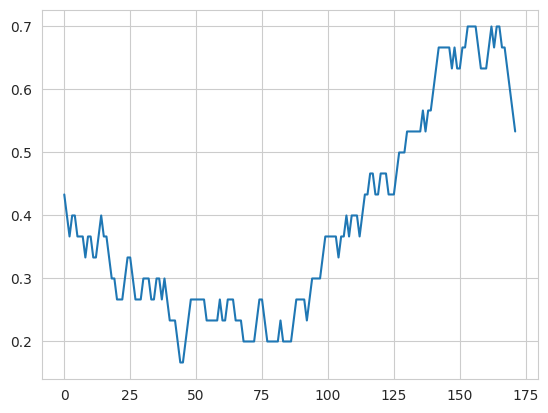

In [37]:
%matplotlib inline
MC.acceptances_plot(convolve_width=30)

In [48]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'

const_in: 7.903612372398382e-06


array([[0.00569284, 0.02764484],
       [0.02499793, 0.9416644 ]])

array([[0.17076292, 0.82923708],
       [0.02586004, 0.97413996]])

array([[0.00325768, 0.03008   ],
       [0.04177225, 0.92489007]])

array([[0.09771763, 0.90228237],
       [0.04321286, 0.95678714]])

':)'

(0.05, 0.12)

(0.8, 1.0)

<Figure size 640x480 with 0 Axes>

(0.06, 0.08)

(0.875, 1.0)

<Figure size 640x480 with 0 Axes>

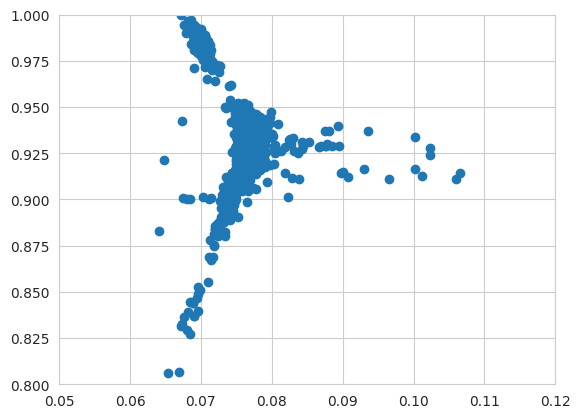

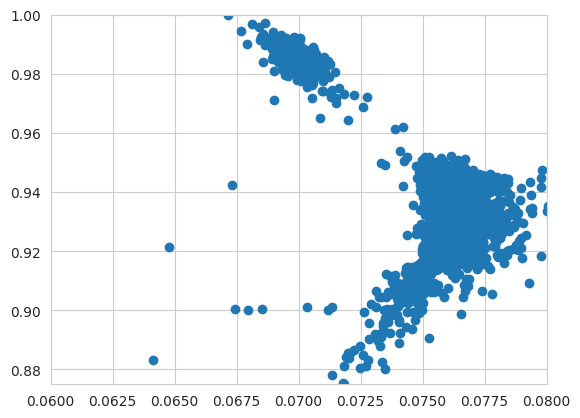

<Figure size 640x480 with 0 Axes>

In [51]:
%matplotlib inline
plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.xlim([0.05, 0.12])
plt.ylim([0.8, 1.0])
plt.figure()

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.xlim([0.06, 0.08])
plt.ylim([0.875, 1.0])
plt.figure()

# plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=1000)
# plt.xlim([0.06, 0.09])
# plt.ylim([0.0, 0.2])

(array([277., 194., 210., 217., 244., 223., 230., 223., 205., 227.]),
 array([0.        , 0.09999247, 0.19998495, 0.29997742, 0.3999699 ,
        0.49996237, 0.59995485, 0.69994732, 0.7999398 , 0.89993227,
        0.99992474]),
 <BarContainer object of 10 artists>)

<Figure size 640x480 with 0 Axes>

(array([252., 203., 214., 247., 237., 234., 221., 202., 216., 224.]),
 array([0.        , 0.09990712, 0.19981424, 0.29972137, 0.39962849,
        0.49953561, 0.59944273, 0.69934986, 0.79925698, 0.8991641 ,
        0.99907122]),
 <BarContainer object of 10 artists>)

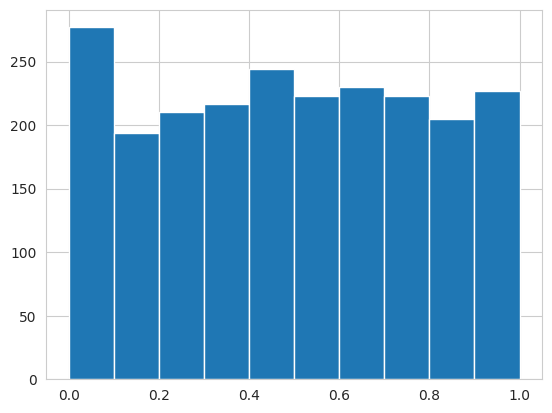

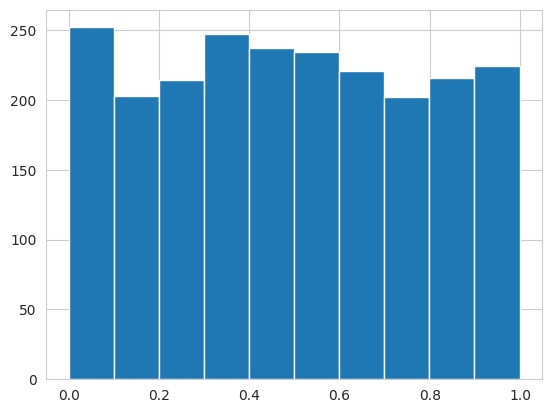

In [52]:
%matplotlib inline
plt.hist(MC.pts[:, 0])
plt.figure()
plt.hist(MC.pts[:, 1])


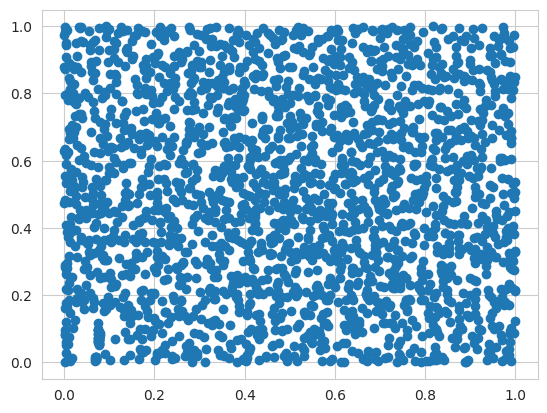

In [53]:
plt.scatter(MC.pts[:, 0], MC.pts[:, 1])

In [16]:
g_mc, A_mc = test_mcmc.MC_to_g_A(MC)
nk.overview(g_mc)

const_in: 0.17931646322859224
Network Properties:
nodes, edges			2250, 75074
directed?			False
weighted?			False
isolated nodes			14
self-loops			0
density				0.029672
clustering coefficient		0.313861
min/max/avg degree		0, 449, 66.732444
degree assortativity		0.071144
number of connected components	15
size of largest component	2236 (99.38 %)


In [17]:
CM = test_mcmc.quick_acc(A, A_mc)
CM
test_mcmc.quick_summarise_CM(CM)

CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)

':('

array([[0.0024798 , 0.03085788],
       [0.02717906, 0.93948326]])

array([[0.07438438, 0.92561562],
       [0.0281164 , 0.9718836 ]])

':('

In [9]:
a = df.loc[:, ['Graph', 'Model', 'Nodes', 'Info']]
a

,Graph,Model,Nodes,Info
0,socfb-Caltech36,1d-copyweight-cube-girg,756,"{'tau': 7.3017225936374555, 'alpha': 1.2171928..."
1,socfb-Reed98,1d-copyweight-cube-girg,955,"{'tau': 4.381732472502371, 'alpha': 1.07671601..."
2,socfb-Caltech36,2d-copyweight-cube-girg,757,"{'tau': 7.3017225936374555, 'alpha': 1.1949215..."
3,socfb-Simmons81,1d-copyweight-cube-girg,1497,"{'tau': 4.739342146243066, 'alpha': 1.16300199..."
4,socfb-Haverford76,1d-copyweight-cube-girg,1440,"{'tau': 6.5461700448727616, 'alpha': 1.0592519..."
...,...,...,...,...
157,socfb-Bingham82,2d-copyweight-cube-girg,9945,"{'tau': 5.959769046529775, 'alpha': 1.07671601..."
158,socfb-Maine59,3d-copyweight-cube-girg,9001,"{'tau': 5.253031117549527, 'alpha': 1.10401932..."
159,socfb-Mississippi66,2d-copyweight-cube-girg,10496,"{'tau': 5.425199038576664, 'alpha': 1.05073058..."
160,socfb-Georgetown15,3d-copyweight-cube-girg,9341,"{'tau': 4.898184083615165, 'alpha': 1.04234527..."


In [21]:
a.loc[a.Graph == 'socfb-Pepperdine86']

,Graph,Model,Nodes,Info
41,socfb-Pepperdine86,1d-copyweight-cube-girg,3430,"{'tau': 5.27297948141534, 'alpha': 1.059251903..."
53,socfb-Pepperdine86,2d-copyweight-cube-girg,3426,"{'tau': 5.27297948141534, 'alpha': 1.025969862..."
67,socfb-Pepperdine86,3d-copyweight-cube-girg,3430,"{'tau': 5.27297948141534, 'alpha': 1.010101010..."


In [22]:
df.iloc[41].Info

{'tau': 5.27297948141534,
 'alpha': 1.0592519033432637,
 'const': 0.10914879350912529,
 'target_lcc': 0.27697571394183823,
 'fit_lcc': 0.2790005420603239,
 'fitting_time': 180.74201369285583,
 'hist': [(2.0, 0.614930496642529),
  (1.342281879194631, 0.42023462193045735),
  (1.1527377521613833, 0.3257112505037432),
  (1.0767160161507403, 0.2855294469587692),
  (1.0423452768729642, 0.26787251887177715),
  (1.0592519033432637, 0.2766223208246902),
  (1.0679125646587686, 0.28514010229395503),
  (1.0592519033432637, 0.2766223208246902)]}

In [23]:
df.iloc[53].Info

{'tau': 5.27297948141534,
 'alpha': 1.0259698621353,
 'const': 0.059451413878825084,
 'target_lcc': 0.27697571394183823,
 'fit_lcc': 0.2748780151815607,
 'fitting_time': 289.33652424812317,
 'hist': [(2.0, 0.5849583176785574),
  (1.342281879194631, 0.4251694982750488),
  (1.1527377521613833, 0.3434494442734461),
  (1.0767160161507403, 0.30518489387359304),
  (1.0423452768729642, 0.2834073963759906),
  (1.0259698621353, 0.274660388413119),
  (1.0340927451930846, 0.28050691796757915),
  (1.0259698621353, 0.274660388413119)]}

In [32]:
import importlib
importlib.reload(test_mcmc)

<module 'tests.test_mcmc' from '../tests/test_mcmc.py'>

In [31]:
# gd = do_feature_extract.graph_dicts[21]

gd = list(filter(lambda x: x['Name'] == 'socfb-Pepperdine86', do_feature_extract.graph_dicts))[0]

in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

alpha = df.iloc[53].Info['alpha']
const = df.iloc[53].Info['const']

'/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine86.SpaceOne'

Network Properties:
nodes, edges			3440, 152003
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.025698
clustering coefficient		0.276976
min/max/avg degree		1, 674, 88.373837
degree assortativity		0.055527
number of connected components	1
size of largest component	3440 (100.00 %)


In [33]:
g, A, weights, const, pts_diffmap, pts_init, MC, MC_init = test_mcmc.test_diffmap_on_g(g, alpha=alpha, const=const, pts_d=2)

../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


In [34]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
g_init, A_init = test_mcmc.MC_to_g_A(MC_init)
nk.overview(g_dm)
nk.overview(g_init)

CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'


const_in: 0.22909876856987865


../benji_girgs/generation.py:65: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:442: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:443: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


const_in: 0.22909876856987865
Network Properties:
nodes, edges			3440, 2987323
directed?			False
weighted?			False
isolated nodes			12
self-loops			0
density				0.505035
clustering coefficient		0.841734
min/max/avg degree		0, 2699, 1736.815698
degree assortativity		0.354706
number of connected components	13
size of largest component	3428 (99.65 %)
Network Properties:
nodes, edges			3440, 152170
directed?			False
weighted?			False
isolated nodes			15
self-loops			0
density				0.025726
clustering coefficient		0.276121
min/max/avg degree		0, 404, 88.470930
degree assortativity		0.041911
number of connected components	16
size of largest component	3425 (99.56 %)


array([[0.0238051 , 0.00188497],
       [0.48108319, 0.49322674]])

array([[0.92662645, 0.07337355],
       [0.49376812, 0.50623188]])

array([[0.00170988, 0.02398019],
       [0.02400842, 0.95030151]])

array([[0.0665579 , 0.9334421 ],
       [0.02464146, 0.97535854]])

':)'

In [ ]:
MC.run_pool(20000, pool_size=15, jobs_per_worker=15, plot_every=20)

In [4]:
from tests import test_mcmc
from tests.test_mcmc import *
import importlib
importlib.reload(test_mcmc)
g, A, weights, const, pts, pts_diffmap, pts_init, MC, MC_init, MC_cheat = test_mcmc.test_diffmap()

g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
g_init, A_init = test_mcmc.MC_to_g_A(MC_init)
g_cheat, A_cheat = test_mcmc.MC_to_g_A(MC_cheat)


<module 'tests.test_mcmc' from '../tests/test_mcmc.py'>

const_in: 21.744500891857935


../benji_girgs/generation.py:65: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:442: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:443: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


const_in: 21.744500891857935
const_in: 21.744500891857935
const_in: 21.744500891857935


In [6]:
(const*2)**alpha

21.744500891857935

In [7]:
g_temp, _, _, _, _ = generation.generate_GIRG_nk(n, d, tau, alpha, weights=weights, pts=pts, const=const)

const_in: 21.744500891857935


In [8]:
const

6.507705243675296

In [9]:
pts

PointsCube([[0.63956876],
            [0.20144225],
            [0.07984331],
            ...,
            [0.88855468],
            [0.70501783],
            [0.04734976]])

In [10]:
nk.overview(g)
nk.overview(g_temp)

Network Properties:
nodes, edges			1500, 70397
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.062617
clustering coefficient		0.563041
min/max/avg degree		21, 1499, 93.862667
degree assortativity		-0.199725
number of connected components	1
size of largest component	1500 (100.00 %)
Network Properties:
nodes, edges			1500, 70327
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.062555
clustering coefficient		0.562545
min/max/avg degree		18, 1499, 93.769333
degree assortativity		-0.199262
number of connected components	1
size of largest component	1500 (100.00 %)


In [11]:
nk.overview(g_cheat)

Network Properties:
nodes, edges			1500, 70672
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.062861
clustering coefficient		0.560786
min/max/avg degree		21, 1499, 94.229333
degree assortativity		-0.199488
number of connected components	1
size of largest component	1500 (100.00 %)


In [12]:
nk.overview(g_dm)

Network Properties:
nodes, edges			1500, 77445
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.068886
clustering coefficient		0.570072
min/max/avg degree		10, 1499, 103.260000
degree assortativity		-0.197577
number of connected components	1
size of largest component	1500 (100.00 %)


In [18]:
CM = test_mcmc.quick_acc(A, A_cheat)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)


array([[0.03788   , 0.02469511],
       [0.02493956, 0.91248533]])

array([[0.6053525 , 0.3946475 ],
       [0.02660432, 0.97339568]])

array([[0.03113422, 0.03144089],
       [0.03770578, 0.89971911]])

array([[0.49754961, 0.50245039],
       [0.04022272, 0.95977728]])

array([[0.01840444, 0.04417067],
       [0.04421867, 0.89320622]])

array([[0.29411765, 0.70588235],
       [0.04717036, 0.95282964]])

In [20]:
np.where(A[0, :])

(array([   7,   15,   17,   20,   23,   38,   53,   75,   77,   86,   88,
          89,  113,  141,  166,  176,  216,  224,  247,  251,  252,  271,
         272,  279,  310,  320,  345,  347,  371,  379,  392,  419,  440,
         447,  452,  456,  469,  488,  493,  505,  522,  526,  545,  559,
         572,  574,  606,  612,  614,  621,  625,  643,  648,  653,  658,
         667,  673,  682,  717,  721,  736,  761,  762,  774,  782,  786,
         805,  817,  835,  837,  844,  849,  897,  900,  904,  917,  929,
         932,  941,  943,  949,  956,  960,  964,  968,  978,  997,  999,
        1017, 1019, 1053, 1062, 1087, 1097, 1100, 1117, 1135, 1140, 1150,
        1163, 1165, 1169, 1170, 1183, 1184, 1216, 1228, 1241, 1252, 1269,
        1284, 1321, 1326, 1338, 1345, 1362, 1382, 1383, 1391, 1397, 1402,
        1422, 1477, 1486]),)

In [14]:
list(g.iterNeighbors(0))

[18,
 66,
 98,
 116,
 169,
 176,
 187,
 198,
 260,
 302,
 311,
 343,
 361,
 367,
 1492,
 403,
 413,
 445,
 446,
 456,
 467,
 475,
 476,
 514,
 520,
 523,
 529,
 541,
 576,
 607,
 614,
 662,
 689,
 700,
 717,
 722,
 754,
 769,
 801,
 808,
 841,
 848,
 884,
 888,
 900,
 903,
 913,
 917,
 923,
 938,
 984,
 986,
 991,
 1006,
 1009,
 1015,
 1021,
 1034,
 1041,
 1042,
 1050,
 1051,
 1071,
 1104,
 1114,
 1169,
 1177,
 1179,
 1189,
 1234,
 1235,
 1255,
 1265,
 1297,
 1301,
 1317,
 1333,
 1344,
 1395,
 1438,
 1449,
 1454,
 1456,
 1459,
 1470,
 1472]

In [15]:
list(g_temp.iterNeighbors(0))

[18,
 66,
 75,
 86,
 98,
 116,
 126,
 169,
 173,
 176,
 192,
 194,
 198,
 212,
 229,
 256,
 260,
 302,
 311,
 343,
 361,
 362,
 367,
 403,
 413,
 433,
 446,
 456,
 467,
 476,
 514,
 517,
 521,
 523,
 529,
 607,
 613,
 648,
 692,
 712,
 714,
 722,
 740,
 754,
 764,
 801,
 836,
 841,
 884,
 888,
 900,
 929,
 950,
 984,
 986,
 991,
 1006,
 1050,
 1051,
 1065,
 1071,
 1104,
 1114,
 1169,
 1179,
 1189,
 1198,
 1218,
 1234,
 1235,
 1257,
 1301,
 1313,
 1317,
 1340,
 1344,
 1361,
 1413,
 1434,
 1438,
 1449,
 1454,
 1456,
 1498]

In [16]:
len(list(g_temp.iterNeighbors(0)))
len(list(g.iterNeighbors(0)))

84

86

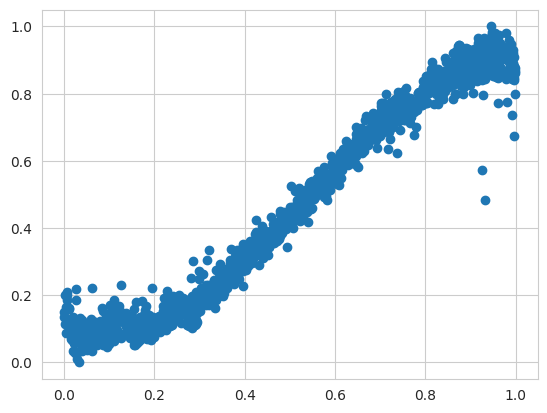

In [6]:
plt.scatter(pts[:, 0], pts_diffmap[:, 0])

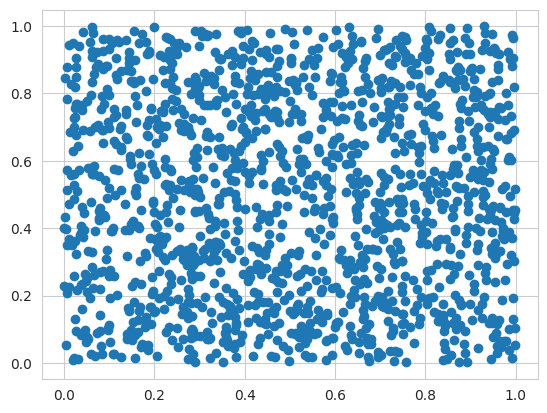

In [7]:
plt.scatter(pts[:, 0], pts_init[:, 0])